In [1]:
from random import gauss
from scipy.stats import expon, norm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams["figure.figsize"] = [6, 4]
plt.rcParams["figure.dpi"] = 125

# Zad 1

In [67]:
def pois_trajectory(l, n_jumps):
    return np.cumsum(expon.rvs(l, size=n_jumps))

def plot_pois_trajectory(l, n_jumps):
    n_jumps += 1
    jump_times = pois_trajectory(l, n_jumps)
    jump_times = np.repeat(jump_times, 2)
    jump_times = np.concatenate(([0.], jump_times[:-1]))
    
    jump_heights = np.array(range(n_jumps))
    jump_heights = np.repeat(jump_heights, 2)
    
    plt.plot(jump_times, jump_heights)
    plt.title("Poisson Process Trajectory")
    plt.legend([f"λ={l}, {n_jumps-1} jumps"])

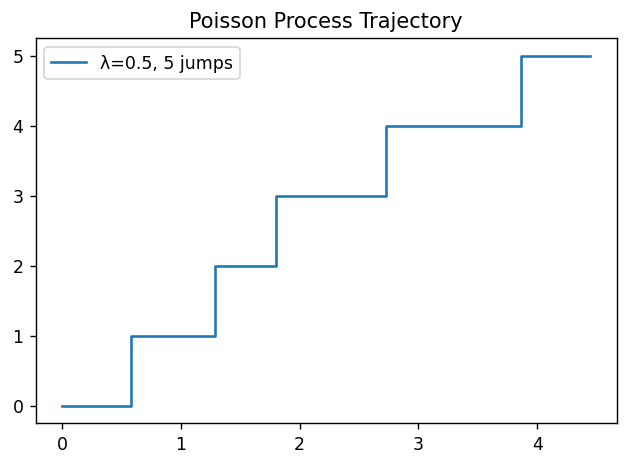

In [132]:
plot_pois_trajectory(0.5, 5)
plt.show()

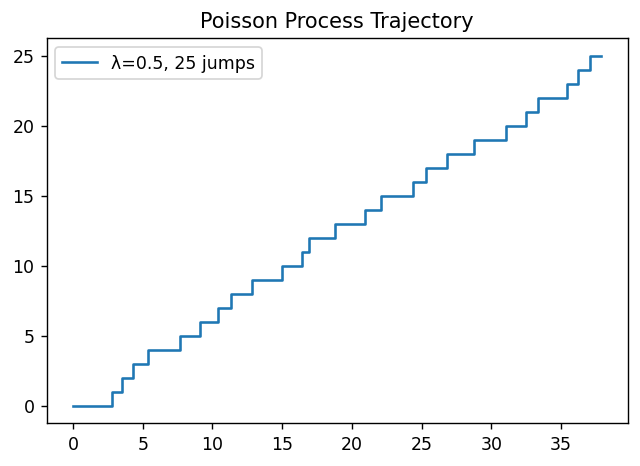

In [133]:
plot_pois_trajectory(0.5, 25)
plt.show()

# Zad 2

In [2]:
def wiener_trajectory_simple(step, samples):
    return np.concatenate((
        np.array([0.]), # zaczynamy w zerze
        np.cumsum(np.sqrt(step) * np.random.normal(size=samples-1))
    )) 

def wiener_with_linspace(from_t, to_t, samples, trajectory_function=wiener_trajectory_simple):
    space, step = np.linspace(from_t, to_t, samples, retstep=True)
    return space, trajectory_function(step, samples)

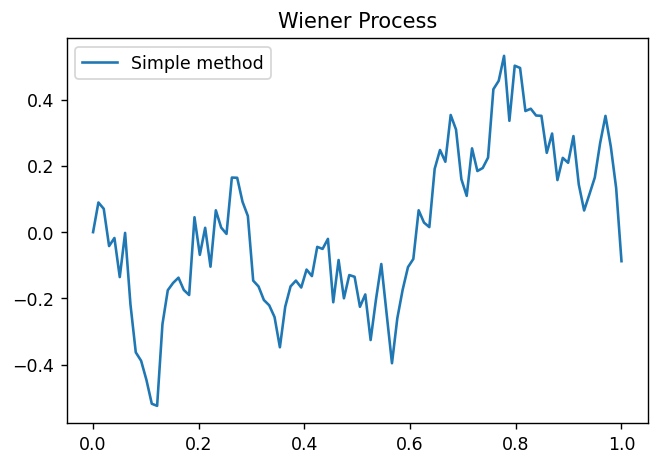

In [134]:
plt.plot(*wiener_with_linspace(0.0, 1.0, 100))
plt.title("Wiener Process")
plt.legend(["Simple method"])
plt.show()

In [7]:
def cholesky(S):
    n = len(S)
    # zmiana w macierz numpy
    L = np.array([[0.0] * n for i in range(n)]) 
    # port python 2 -> 3
    for i in range(n):
        for k in range(i+1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in range(k))
            if (i == k):
                L[i][k] = np.sqrt(S[i][i] - tmp_sum)
            else:
                L[i][k] = (1.0 / L[k][k] * (S[i][k] - tmp_sum))
    return L


In [8]:
def generate_wiener_matrix(step, samples):
    matrix = np.zeros(shape=(samples, samples))
    cum = step
    for i in range(samples):
        matrix[i:samples, i] = cum
        matrix[i, i:samples] = cum
        cum += step
    return matrix

In [9]:
generate_wiener_matrix(0.01, 100)

array([[0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
       [0.01, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
       [0.01, 0.02, 0.03, ..., 0.03, 0.03, 0.03],
       ...,
       [0.01, 0.02, 0.03, ..., 0.98, 0.98, 0.98],
       [0.01, 0.02, 0.03, ..., 0.98, 0.99, 0.99],
       [0.01, 0.02, 0.03, ..., 0.98, 0.99, 1.  ]])

In [10]:
def cholesky_trajectory(step, samples):
    trajectory = cholesky(generate_wiener_matrix(step, samples-1)) @ norm.rvs(size=samples-1)
    return np.concatenate((
        np.array([0.]), # zaczynamy w zerze
        trajectory
    ))

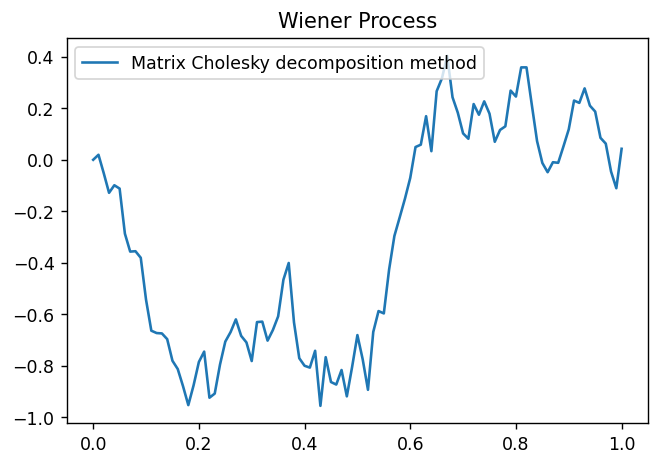

In [135]:
plt.plot(*wiener_with_linspace(from_t=0.0, to_t=1.0, samples=101, trajectory_function=cholesky_trajectory))
plt.title("Wiener Process")
plt.legend(["Matrix Cholesky decomposition method"])
plt.show()

In [12]:
cholesky(generate_wiener_matrix(0.04, 100))

array([[0.2, 0. , 0. , ..., 0. , 0. , 0. ],
       [0.2, 0.2, 0. , ..., 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, ..., 0. , 0. , 0. ],
       ...,
       [0.2, 0.2, 0.2, ..., 0.2, 0. , 0. ],
       [0.2, 0.2, 0.2, ..., 0.2, 0.2, 0. ],
       [0.2, 0.2, 0.2, ..., 0.2, 0.2, 0.2]])

In [13]:
def no_decomposition_wiener(step, samples):
    matrix = np.zeros(shape=(samples, samples))
    value = np.sqrt(step)
    for i in range(samples):
        matrix[i:samples, i] =  value
    return matrix
no_decomposition_wiener(0.04, 100)

array([[0.2, 0. , 0. , ..., 0. , 0. , 0. ],
       [0.2, 0.2, 0. , ..., 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, ..., 0. , 0. , 0. ],
       ...,
       [0.2, 0.2, 0.2, ..., 0.2, 0. , 0. ],
       [0.2, 0.2, 0.2, ..., 0.2, 0.2, 0. ],
       [0.2, 0.2, 0.2, ..., 0.2, 0.2, 0.2]])

In [14]:
def nocholesky_trajectory(step, samples):
    trajectory = no_decomposition_wiener(step, samples-1) @ norm.rvs(size=samples-1)
    return np.concatenate((
        np.array([0.]), # zaczynamy w zerze
        trajectory
    ))

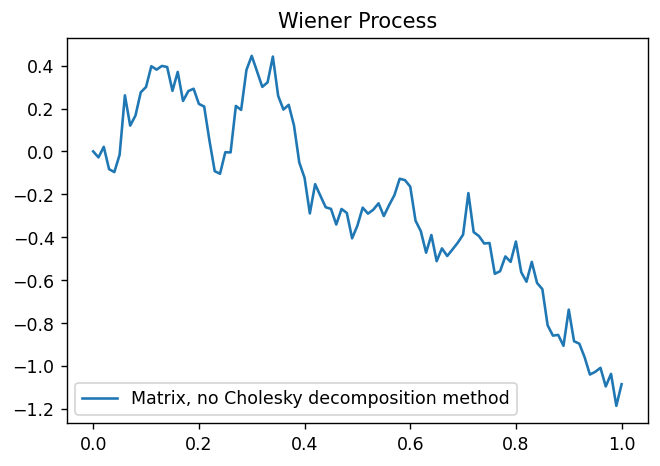

In [136]:
plt.plot(*wiener_with_linspace(from_t=0.0, to_t=1.0, samples=101, trajectory_function=nocholesky_trajectory))
plt.title("Wiener Process")
plt.legend(["Matrix, no Cholesky decomposition method"])
plt.show()

## Czasy

In [16]:
%%timeit
wiener_trajectory_simple(0.01, 1_000)

43.6 µs ± 128 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [17]:
%%timeit
nocholesky_trajectory(0.01, 1_000)

2.83 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [18]:
%%timeit
cholesky_trajectory(0.01, 100) # redukcja z 1000 do 100, 

142 ms ± 2.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
%%time 
cholesky_trajectory(0.01, 1_000)
None

CPU times: user 2min 15s, sys: 164 ms, total: 2min 15s
Wall time: 2min 15s


In [20]:
from time import time_ns
def time_for_n(n, function):
    start = time_ns()
    function(0.01, n)
    return (time_ns() - start) * 1e-9

In [21]:
counts1 = np.array([i for i in range(2,100)])
simple_gen1 = np.array([time_for_n(i, wiener_trajectory_simple) for i in range(2,100)])
nocho_gen1 = np.array([time_for_n(i, nocholesky_trajectory) for i in range(2,100)])
cholesky_gen1 = np.array([time_for_n(i, cholesky_trajectory) for i in range(2,100)])

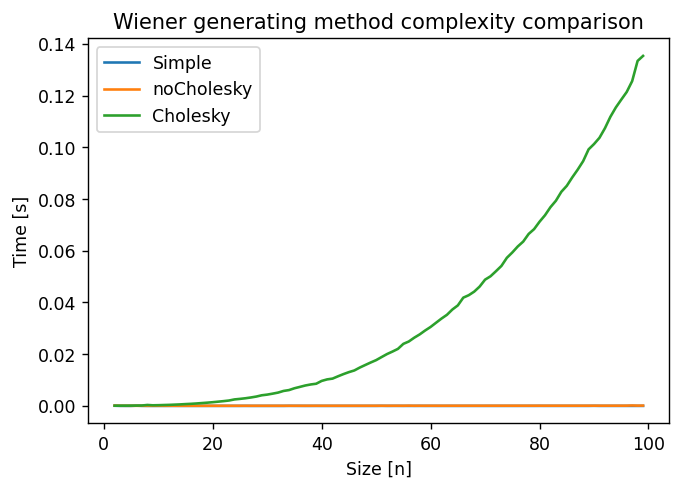

In [137]:
plt.plot(counts1, simple_gen1)
plt.plot(counts1, nocho_gen1)
plt.plot(counts1, cholesky_gen1)
plt.ylabel("Time [s]")
plt.xlabel("Size [n]")
plt.legend(("Simple","noCholesky", "Cholesky"))
plt.title("Wiener generating method complexity comparison")
plt.show()

In [23]:
counts2 = np.array([i for i in range(2,5_000, 100)])
simple_gen2 = np.array([time_for_n(i, wiener_trajectory_simple) for i in range(2, 5_000, 100)])
nocho_gen2 = np.array([time_for_n(i, nocholesky_trajectory) for i in range(2, 5_000, 100)])

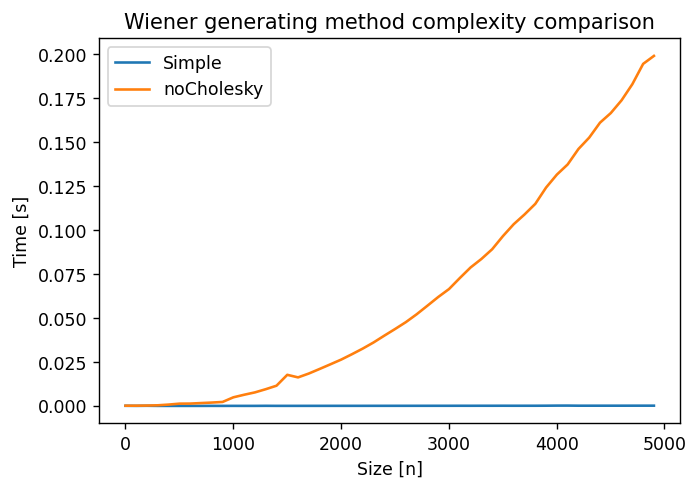

In [138]:
plt.plot(counts2, simple_gen2)
plt.plot(counts2, nocho_gen2)
plt.ylabel("Time [s]")
plt.xlabel("Size [n]")
plt.legend(("Simple", "noCholesky"))
plt.title("Wiener generating method complexity comparison")
plt.show()

# Zad3

In [25]:
def wiener_trajectory_multidim(dim, *args, **kwargs):
    return (wiener_trajectory_simple(*args, **kwargs) for _ in range(dim))

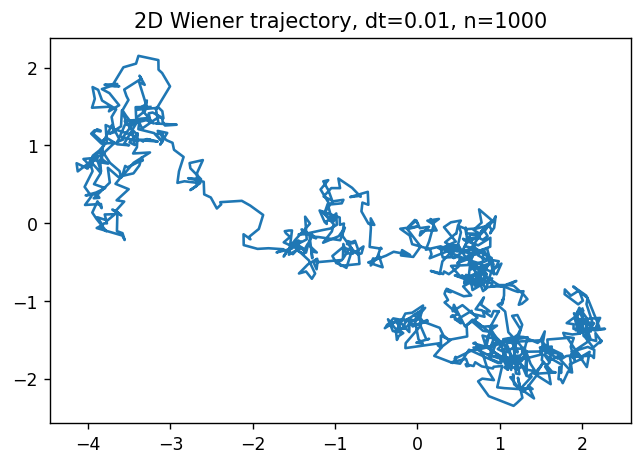

In [139]:
plt.plot(*wiener_trajectory_multidim(2, step=0.01, samples=1000))
plt.title(f"2D Wiener trajectory, dt={0.01}, n={1000}")
plt.show()

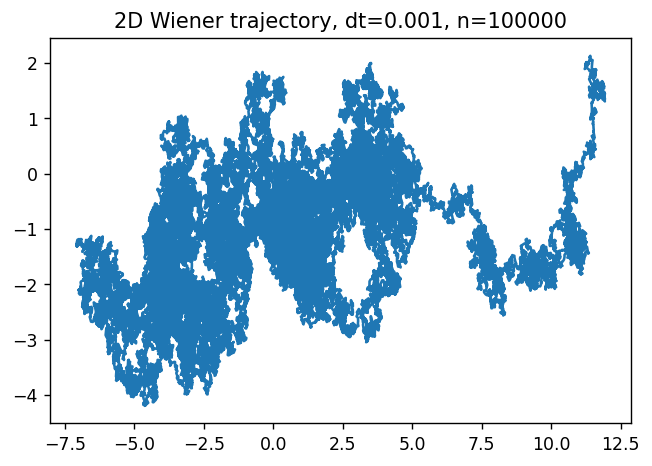

In [140]:
plt.plot(*wiener_trajectory_multidim(2, step=0.001, samples=100_000))
plt.title(f"2D Wiener trajectory, dt={0.001}, n={100_000}")
plt.show()

In [45]:
from IPython.display import HTML
from matplotlib import animation

In [141]:
sample_count = 1000
w_x, w_y = wiener_trajectory_multidim(2, step=0.001, samples=sample_count)

fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

def show_first_n(n):
    line.set_data(w_x[:n], w_y[:n])
    return line,

anim = animation.FuncAnimation(fig, show_first_n, frames=sample_count, interval=60, blit=True)
plt.title("2D wiener trajectory, animated, full tail")
plt.close()
HTML(anim.to_html5_video())

In [143]:
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
sc = ax.scatter([0],[0])

def show_nth(n):
    sc.set_offsets(
        np.hstack(([w_x[n]], [w_y[n]]))
    )
    return sc, 
    
anim = animation.FuncAnimation(fig, show_nth, frames=sample_count, interval=60, blit=True)
plt.title("2D wiener trajectory, animated, no tail")
plt.close()
HTML(anim.to_html5_video())

In [142]:
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

tail_len = 20

def show_tail(n):
    start = max(n-tail_len, 0)
    line.set_data(w_x[start:n], w_y[start:n])
    return line,

sc = ax.scatter([0],[0])

def show_nth(n):
    sc.set_offsets(
        np.hstack(([w_x[n]], [w_y[n]]))
    )
    return sc, 

def show_tail_and_dot(n):
    return show_tail(n), show_nth(n)


anim = animation.FuncAnimation(fig, show_tail_and_dot, frames=sample_count, interval=60, blit=False)
plt.title("2D wiener trajectory, animated, small tail")
plt.close()
HTML(anim.to_html5_video())

# Zad 4

In [ ]:
# todo: teoria

In [90]:
def wiener_trajectory_2d_correlated(step, samples, correlation):
    w1, w2 = wiener_trajectory_multidim(2, step, samples)
    return w1, w1*correlation + np.sqrt(1-correlation*correlation) * w2

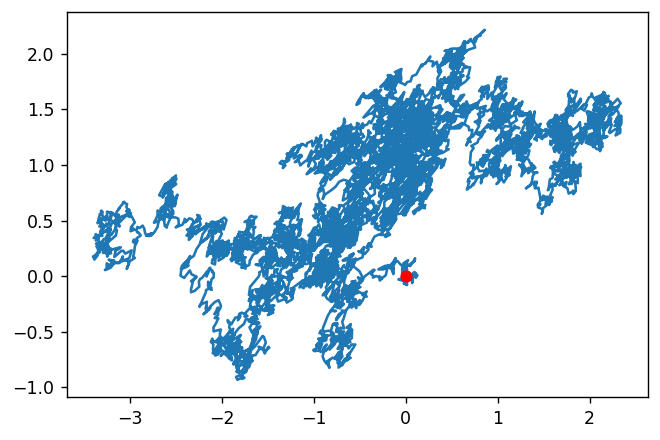

In [144]:
plt.plot(*wiener_trajectory_2d_correlated(0.001, 10_000, 0.5), zorder=1)
plt.scatter([0], [0], color="red", zorder=2)
plt.show()

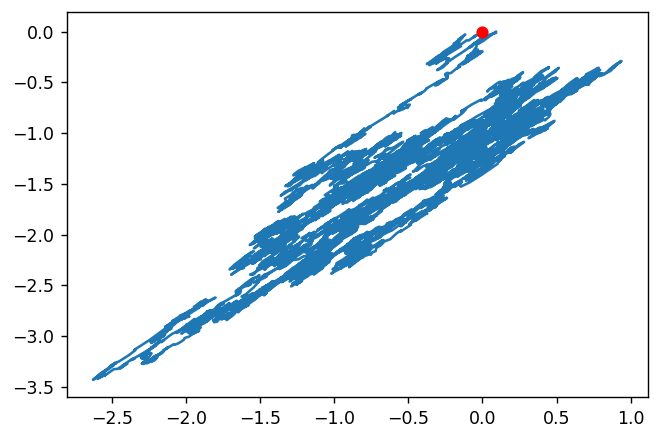

In [145]:
plt.plot(*wiener_trajectory_2d_correlated(0.001, 10_000, 0.95), zorder=1)
plt.scatter([0], [0], color="red", zorder=2)
plt.show()

# Zad 5

In [97]:
variates_count = 1_000_000

## MPWL
### Kod

In [98]:
from numba import njit
from random import random as uniform, seed as seed_rng, randint

def some_seed():
    return randint(-1_000_000, 1_000_000)

@njit
def mpwl_rvs(n):
    n1 = n + 1
    n2 = 2*np.sqrt(n1 * n1 * n1)
    n3 = 1/n2
    
    u = uniform()
    if u <= n3:
        return -n1
    elif u <= 2*n3:
        return n1
    else:
        return 0
    
@njit
def mpwl_cum_rvs(limit, seed=123):
    # uwaga: numba ma thread-local seedy i czasami nie chce się zaseedować z RNG pythona
    seed_rng(seed) 
    arr = np.zeros(limit)
    cum = 0
    for i in range(1, limit):
        cum += mpwl_rvs(i)
        arr[i] = float(cum) / float(i)
    return arr
    

### Prędkość

In [99]:
%%timeit
np.cumsum(
    np.array(
        [mpwl_rvs(i) for i in range(1, variates_count)])
) / np.array([i for i in range(1, variates_count)])

371 ms ± 3.86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [100]:
%%timeit
mpwl_cum_rvs(variates_count, seed=some_seed())

27.5 ms ± 433 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Wykresy

In [122]:
def pwl_style():
    plt.ylabel("Mean so far")
    plt.xlabel("Number of samples")

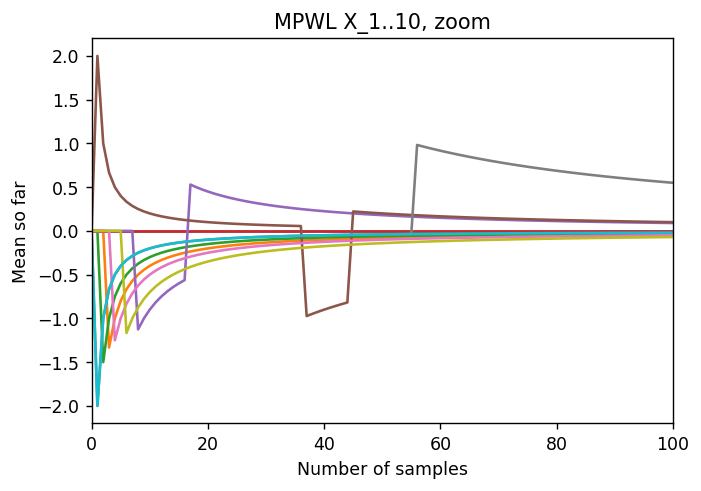

In [151]:
for i in range(10):
    plt.plot(mpwl_cum_rvs(variates_count, seed=i))
plt.title("MPWL X_1..10, zoom")
plt.xlim(0, 100)
pwl_style()

plt.show()

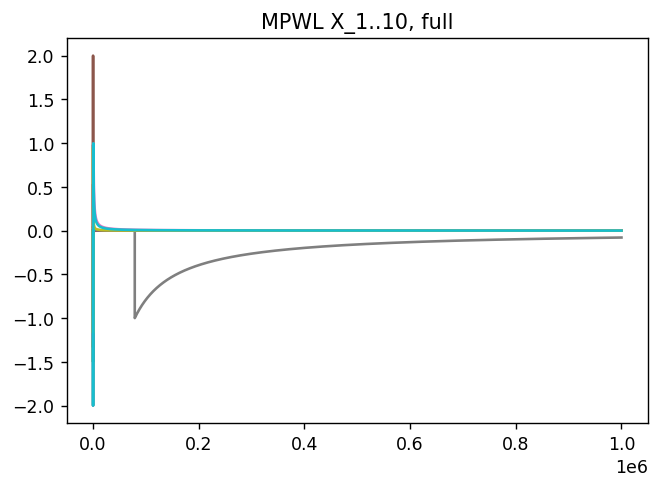

In [152]:
for i in range(10):
    plt.plot(mpwl_cum_rvs(variates_count, seed=i))
plt.title("MPWL X_1..10, full")
pwl_style()
plt.show()

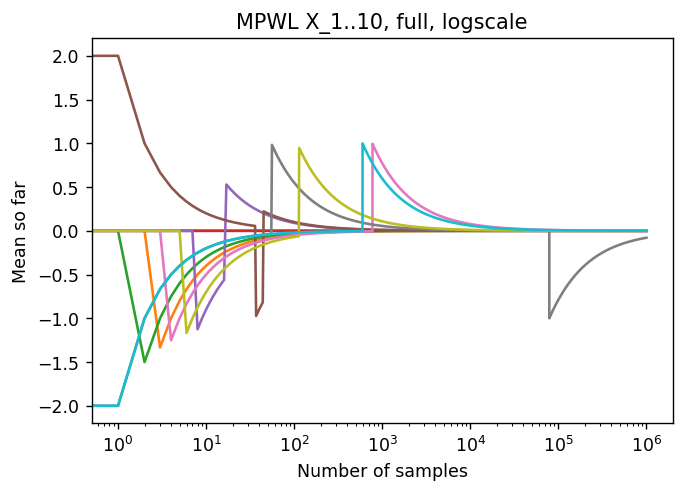

In [154]:
for i in range(10):
    plt.plot(mpwl_cum_rvs(variates_count, seed=i))
plt.title("MPWL X_1..10, full, logscale")
plt.xscale("log")
pwl_style()
plt.show()

## SPWL
### Kod

In [159]:
@njit
def spwl_rvs(n):
    n1 = n + 1
    n2 = 2*n1*np.log(n1)
    n3 = 1/n2 
    
    u = uniform()
    if u <= n3:
        return -n1
    elif u <= 2*n3:
        return n1
    else:
        return 0

@njit
def spwl_cum_rvs(limit, seed=123):
    # uwaga: numba ma thread-local seedy i czasami nie chce się zaseedować z RNG pythona
    seed_rng(seed) 
    arr = np.zeros(limit)
    cum = 0
    for i in range(1, limit):
        cum += spwl_rvs(i)
        arr[i] = float(cum) / float(i)
    return arr

### Wykresy

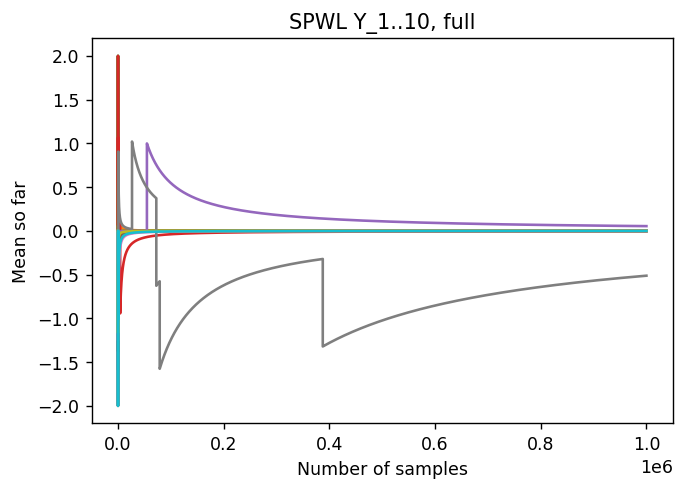

In [170]:
for i in range(10):
    plt.plot(spwl_cum_rvs(variates_count, seed=i))
plt.title("SPWL Y_1..10, full")
pwl_style()
plt.show()

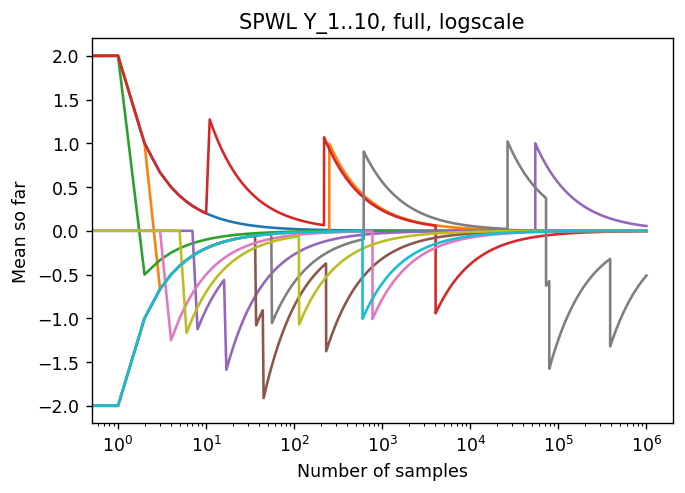

In [169]:
for i in range(10):
    plt.plot(spwl_cum_rvs(variates_count, seed=i))
plt.title("SPWL Y_1..10, full, logscale")
plt.xscale("log")
pwl_style()
plt.show()

## Brak zbieżności
(NiePWL)
### Kod

In [176]:
@njit
def npwl_rvs(n):
    n1 = n + 1
    n2 = 2*n1
    n3 = 1/n2 
    
    u = uniform()
    if u <= n3:
        return -n1
    elif u <= 2*n3:
        return n1
    else:
        return 0

@njit
def npwl_cum_rvs(limit, seed=123):
    # uwaga: numba ma thread-local seedy i czasami nie chce się zaseedować z RNG pythona
    seed_rng(seed) 
    arr = np.zeros(limit)
    cum = 0
    for i in range(1, limit):
        cum += npwl_rvs(i)
        arr[i] = float(cum) / float(i)
    return arr

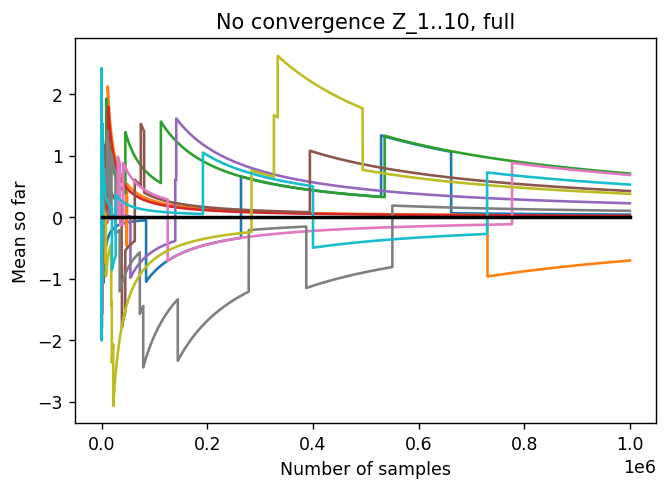

In [181]:
for i in range(10):
    plt.plot(npwl_cum_rvs(variates_count, seed=i))
plt.title("No convergence Z_1..10, full")
plt.plot([0,variates_count], [0, 0], color="black", lw=2)
pwl_style()
plt.show()

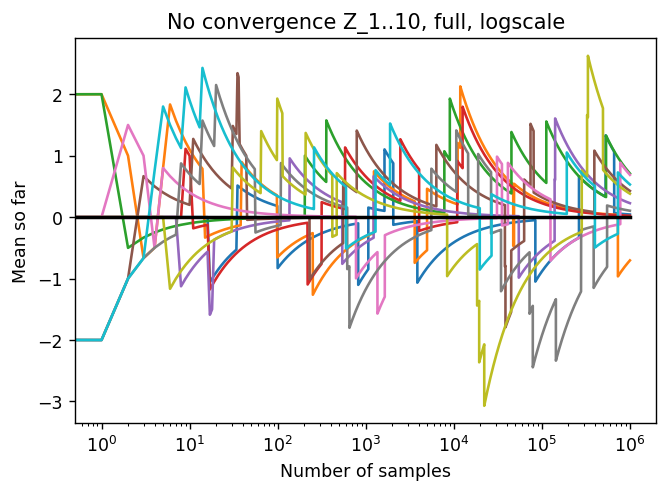

In [182]:
for i in range(10):
    plt.plot(npwl_cum_rvs(variates_count, seed=i))
plt.title("No convergence Z_1..10, full, logscale")
plt.xscale("log")
plt.plot([0,variates_count], [0, 0], color="black", lw=2)
pwl_style()
plt.show()

# Zad 6
Jupyter wycieka pamięć, dla tych dwóch ostatnich komórek musiałem restartować kernel.
Na moim laptopie w ogóle nie działało.

In [2]:
def wiener_trajectory_simple(step, samples):
    return np.concatenate((
        np.array([0.]), # zaczynamy w zerze
        np.cumsum(np.sqrt(step) * np.random.normal(size=samples-1))
    )) 

def wiener_with_linspace(from_t, to_t, samples, trajectory_function=wiener_trajectory_simple):
    space, step = np.linspace(from_t, to_t, samples, retstep=True)
    return space, trajectory_function(step, samples)

def pil(x):
    return np.sqrt(2 * x * np.log(np.log(x)))

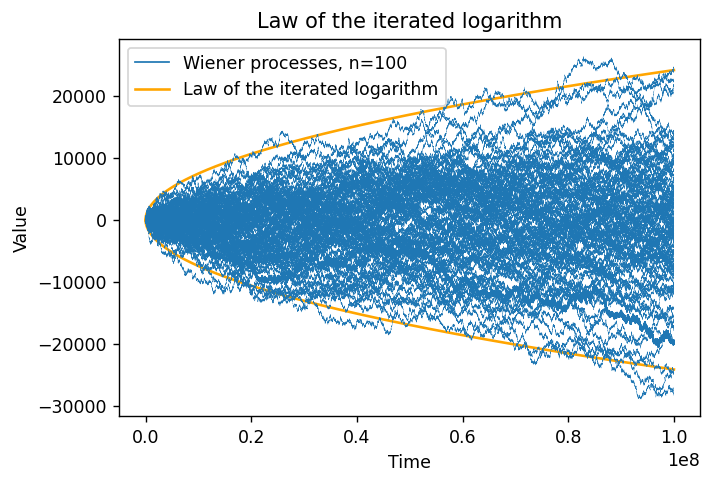

In [4]:
process_count = 100
space, trajectory = wiener_with_linspace(10.0, 100_000_000.0, samples=1_000_000)
f_up = pil(space)
f_down = -f_up
plt.plot(space, trajectory, color="C0", lw=1)
plt.plot(space, f_up, color="orange")
plt.plot(space, f_down, color="orange")

for i in range(1,process_count):
    _, ti = wiener_with_linspace(10.0, 100_000_000.0, samples=1_000_000)
    plt.plot(space, ti, color="C0", lw=0.1)

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend([f"Wiener processes, n={process_count}", "Law of the iterated logarithm"], loc="upper left")
plt.title("Law of the iterated logarithm")
plt.show()

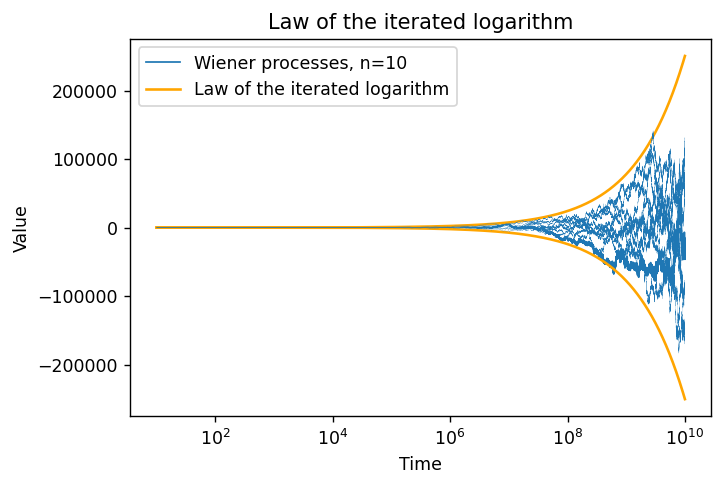

In [3]:
process_count = 10
space, trajectory = wiener_with_linspace(10.0, 10_000_000_000.0, samples=1_000_000)
f_up = pil(space)
f_down = -f_up
plt.plot(space, trajectory, color="C0", lw=1)
plt.plot(space, f_up, color="orange")
plt.plot(space, f_down, color="orange")

for i in range(1,process_count):
    _, ti = wiener_with_linspace(10.0, 10_000_000_000.0, samples=1_000_000)
    plt.plot(space, ti, color="C0", lw=0.1)

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend([f"Wiener processes, n={process_count}", "Law of the iterated logarithm"], loc="upper left")
plt.title("Law of the iterated logarithm")
plt.xscale("log")
plt.show()